In [2]:
import os
import pandas as pd
import numpy as np

# CSV Ìè¥Îçî Í≤ΩÎ°ú
csv_dir = "/home/avees/tee/output"

# ÎùºÎ≤®Î≥ÑÎ°ú Í∞í ÎàÑÏ†Å
label_data = {}

# Ìè¥Îçî ÎÇ¥ CSV ÌååÏùºÎì§ ÏùΩÍ∏∞
csv_files = [f for f in os.listdir(csv_dir) if f.endswith(".csv")]

for filename in sorted(csv_files):
    file_path = os.path.join(csv_dir, filename)
    try:
        df = pd.read_csv(file_path)
        for col in df.columns:
            values = df[col].dropna().astype(float).tolist()
            if not values:
                continue
            if col not in label_data:
                label_data[col] = []
            label_data[col].extend(values)
    except Exception as e:
        print(f"‚ö†Ô∏è {filename} ÏùΩÍ∏∞ Ïã§Ìå®: {e}")

# ÎùºÎ≤®Î≥Ñ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
summary_rows = []
for label, values in label_data.items():
    sorted_vals = sorted(values, reverse=True)
    max_val = sorted_vals[0]
    max2_val = sorted_vals[4] if len(sorted_vals) > 4 else np.nan
    min_val = sorted_vals[-1]
    mean_val = np.nan
    if len(sorted_vals) > 1:
        mean_val = np.mean(sorted_vals[5:])  # ÏµúÎåÄÍ∞í Ï†úÏô∏ ÌèâÍ∑†

    summary_rows.append({
        "label": label,
        "count": len(values),
        "max": max_val,
        "max5": max2_val,
        "min": min_val,
        "mean(exclude_max)": mean_val
    })

# DataFrameÏúºÎ°ú Î≥ÄÌôò Î∞è Ï†ÄÏû•
summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(by="label")

output_path = os.path.join(csv_dir, "output_merged.csv")
summary_df.to_csv(output_path, index=False)

print(f"\n‚úÖ Î™®Îì† ÌååÏùº ÌÜµÌï© ÎùºÎ≤®Î≥Ñ ÌÜµÍ≥Ñ ÏôÑÎ£å ‚Üí {output_path}")
print(f"Ï¥ù {len(summary_df)}Í∞ú ÎùºÎ≤® Í≥ÑÏÇ∞Îê®")



‚úÖ Î™®Îì† ÌååÏùº ÌÜµÌï© ÎùºÎ≤®Î≥Ñ ÌÜµÍ≥Ñ ÏôÑÎ£å ‚Üí /home/avees/tee/output/output_merged.csv
Ï¥ù 166Í∞ú ÎùºÎ≤® Í≥ÑÏÇ∞Îê®


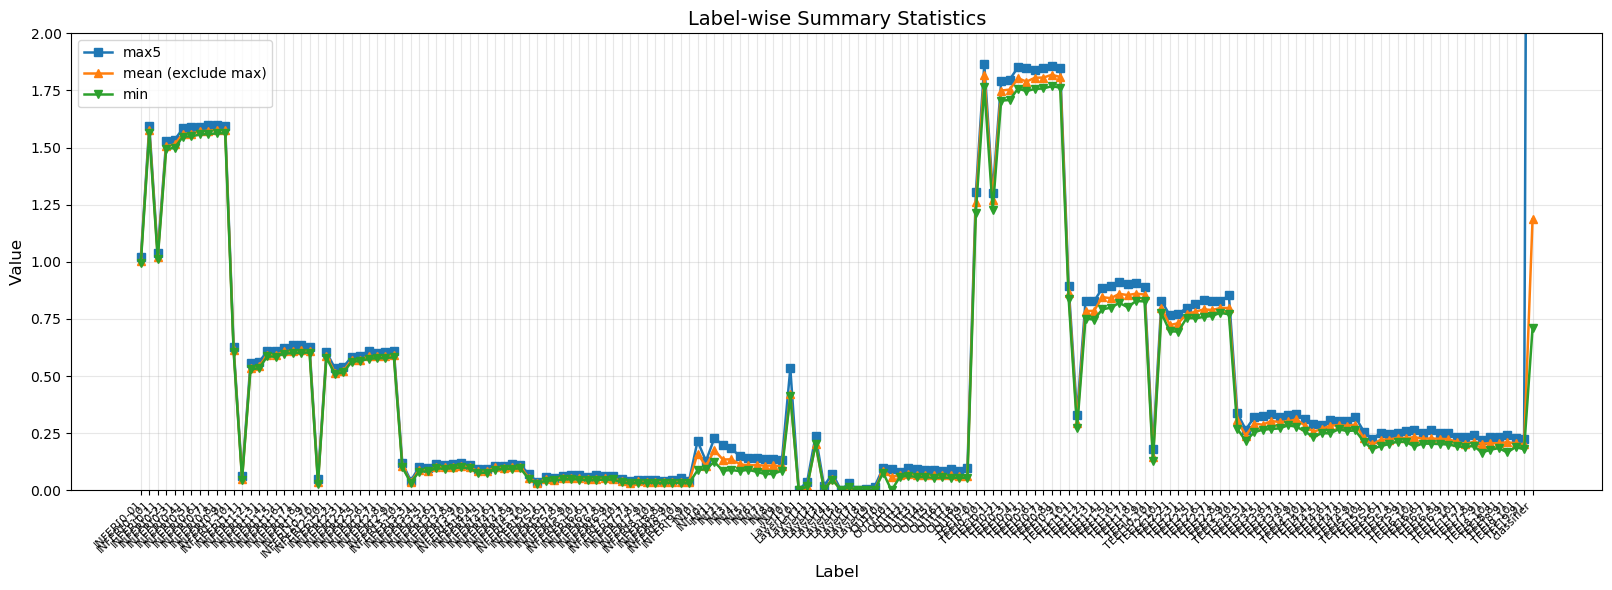

‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: /home/avees/tee/output/summary_plot.png


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ï†ïÎ¶¨Îêú CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/home/avees/tee/output/output_merged.csv"

# CSV ÌååÏùº ÏùΩÍ∏∞
df = pd.read_csv(csv_path)

# Ïª¨Îüº Ïù¥Î¶Ñ ÌÜµÏùº (mean Ïª¨Îüº Ïù¥Î¶ÑÏù¥ Í¥ÑÌò∏ ÎïåÎ¨∏Ïóê Ï≤òÎ¶¨ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏñ¥ ÏàòÏ†ï)
df.rename(columns={"mean(exclude_max)": "mean"}, inplace=True)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.figure(figsize=(16, 6))
x = np.arange(len(df["label"]))  # ÎùºÎ≤® Í∞úÏàòÎßåÌÅº xÏ∂ï Ïù∏Îç±Ïä§

# Í∞Å ÌÜµÍ≥ÑÍ∞í plot
plt.plot(x, df["max5"], marker='s', label='max5', linewidth=1.8)
plt.plot(x, df["mean"], marker='^', label='mean (exclude max)', linewidth=1.8)
plt.plot(x, df["min"], marker='v', label='min', linewidth=1.8)

# ÏãúÍ∞ÅÏ†Å ÏÑ∏Î∂Ä ÏÑ§Ï†ï
plt.xticks(x, df["label"], rotation=45, ha='right', fontsize=8)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("Label-wise Summary Statistics", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Ï†ÄÏû• Î∞è Ï∂úÎ†•
output_png = os.path.join(os.path.dirname(csv_path), "summary_plot.png")
plt.savefig(output_png, dpi=300)
plt.ylim(0, 2)
plt.show()

print(f"‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: {output_png}")


‚úÖ TEE ÎùºÎ≤® Í∞úÏàò: 11
‚úÖ LAYER ÎùºÎ≤® Í∞úÏàò: 11


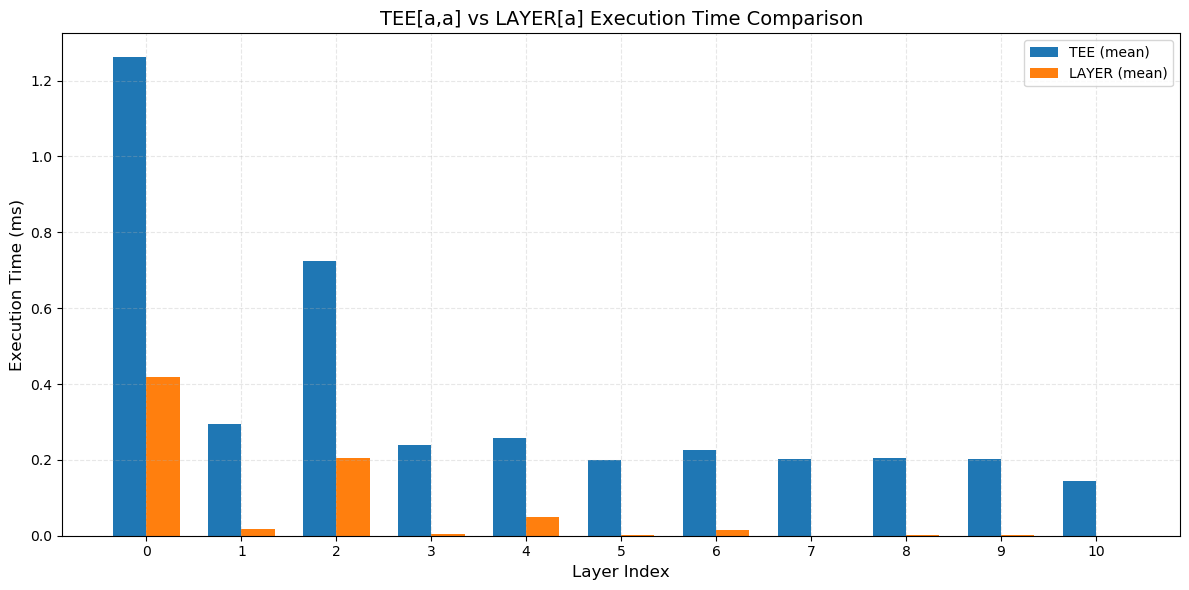

‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: /home/avees/tee/output/tee_layer_indexed_comparison.png


In [20]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/home/avees/tee/output/output_merged.csv"

# CSV ÏùΩÍ∏∞
df = pd.read_csv(csv_path)
df.rename(columns={"mean(exclude_max)": "mean"}, inplace=True)

# üîπ TEE, LAYER ÎùºÎ≤®Îßå ÌïÑÌÑ∞ÎßÅ (ÎåÄÏÜåÎ¨∏Ïûê Î¨¥Ïãú)
df = df[df["label"].str.contains("TEE|LAYER", case=False, na=False)].copy()

# üîπ ÎùºÎ≤®ÏóêÏÑú index Ï∂îÏ∂ú
def extract_index(label):
    label = label.upper()
    # TEE[a-a] ÌòïÏãù
    m1 = re.search(r"TEE\[(\d+)-\1\]", label)
    # LAYER[a] ÎòêÎäî LAYER[a-a] ÌòïÏãù
    m2 = re.search(r"LAYER\[(\d+)(?:-\1)?\]", label)
    if m1:
        return int(m1.group(1))
    elif m2:
        return int(m2.group(1))
    return None

df["index"] = df["label"].apply(extract_index)
df = df.dropna(subset=["index"]).copy()
df["index"] = df["index"].astype(int)

# üîπ Î∂ÑÎ¶¨
tee_df = df[df["label"].str.contains("TEE", case=False)]
layer_df = df[df["label"].str.contains("LAYER", case=False)]

print(f"‚úÖ TEE ÎùºÎ≤® Í∞úÏàò: {len(tee_df)}")
print(f"‚úÖ LAYER ÎùºÎ≤® Í∞úÏàò: {len(layer_df)}")

# üîπ XÏ∂ï Î≤îÏúÑ (0~10)
x_labels = list(range(0, 11))
x = np.arange(len(x_labels))
width = 0.35

tee_y, layer_y = [], []

for i in x_labels:
    tee_row = tee_df[tee_df["index"] == i]
    layer_row = layer_df[layer_df["index"] == i]

    tee_val = tee_row["mean"].values[0] if not tee_row.empty else np.nan
    layer_val = layer_row["mean"].values[0] if not layer_row.empty else np.nan

    tee_y.append(tee_val)
    layer_y.append(layer_val)

# üîπ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, tee_y, width=width, label="TEE (mean)", color="#1f77b4")
plt.bar(x + width/2, layer_y, width=width, label="LAYER (mean)", color="#ff7f0e")

plt.xticks(x, x_labels)
plt.xlabel("Layer Index", fontsize=12)
plt.ylabel("Execution Time (ms)", fontsize=12)
plt.title("TEE[a,a] vs LAYER[a] Execution Time Comparison", fontsize=14)
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()

# Ï†ÄÏû•
output_png = os.path.join(os.path.dirname(csv_path), "tee_layer_indexed_comparison.png")
plt.savefig(output_png, dpi=300)
plt.show()

print(f"‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: {output_png}")


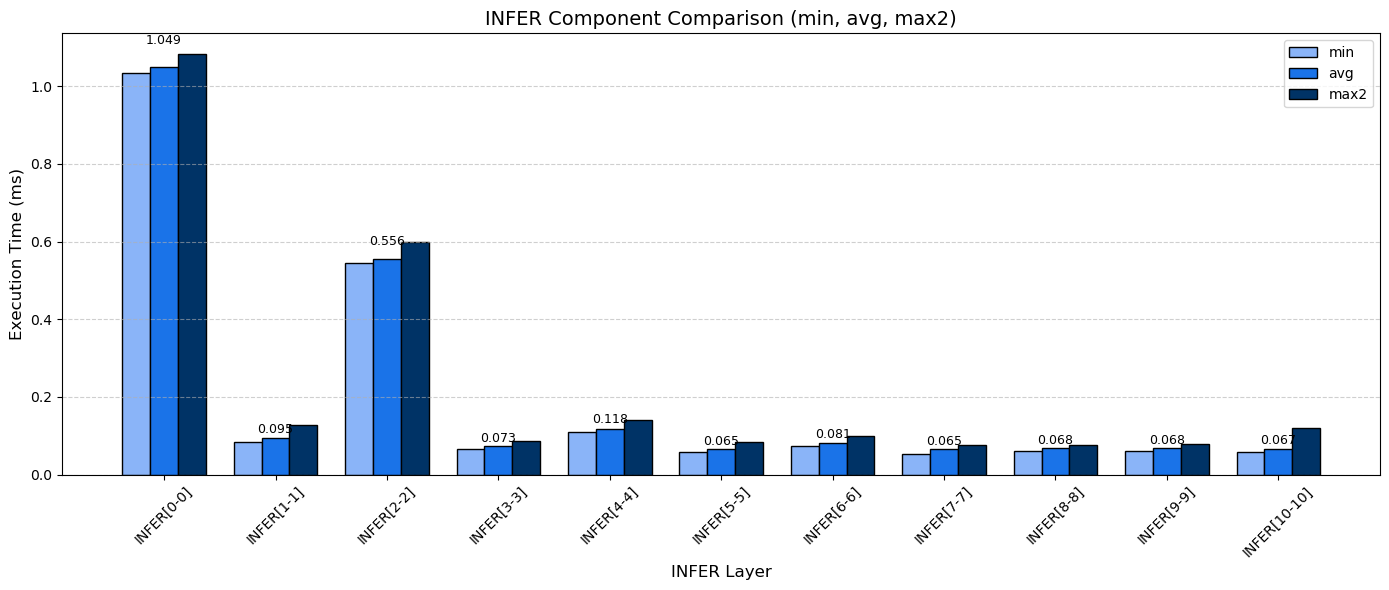

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/home/avees/tee/graph/component/src/INFER.csv"

# CSV ÏùΩÍ∏∞
df = pd.read_csv(csv_path, index_col=0)

# ÏÇ¨Ïö©Ìï† Ìñâ ÏÑ†ÌÉù (ÏàúÏÑú: min ‚Üí avg ‚Üí max2)
selected_rows = ['min', 'avg', 'max2']
df_selected = df.loc[selected_rows]

# ÎùºÎ≤® (xÏ∂ï)
labels = df.columns.tolist()
x = np.arange(len(labels))  # x ÏúÑÏπò

# ÎßâÎåÄ Ìè≠
width = 0.25

plt.figure(figsize=(14, 6))

# ÎèôÏùºÌïú hueÏóê Ï±ÑÎèÑÎßå Îã§Î•∏ ÏÉâÏÉÅ
colors = ['#8ab4f8', '#1a73e8', '#003366']  # Î∞ùÏùÄ ÌååÎûë ‚Üí Ï§ëÍ∞Ñ ‚Üí ÏßÑÌïú ÎÑ§Ïù¥ÎπÑ

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars_min = plt.bar(x - width, df_selected.loc['min'], width,
                   label='min', color=colors[0], edgecolor='black')
bars_avg = plt.bar(x, df_selected.loc['avg'], width,
                   label='avg', color=colors[1], edgecolor='black')
bars_max2 = plt.bar(x + width, df_selected.loc['max2'], width,
                    label='max2', color=colors[2], edgecolor='black')

# avg ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for i, v in enumerate(df_selected.loc['avg']):
    plt.text(x[i], v + (v * 0.05), f"{v:.3f}", ha='center', va='bottom', fontsize=9)

# ÏãúÍ∞ÅÏ†Å ÏÑ§Ï†ï
plt.title("INFER Component Comparison (min, avg, max2)", fontsize=14)
plt.ylabel("Execution Time (ms)", fontsize=12)
plt.xlabel("INFER Layer", fontsize=12)
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


üìä Processing: IN.csv


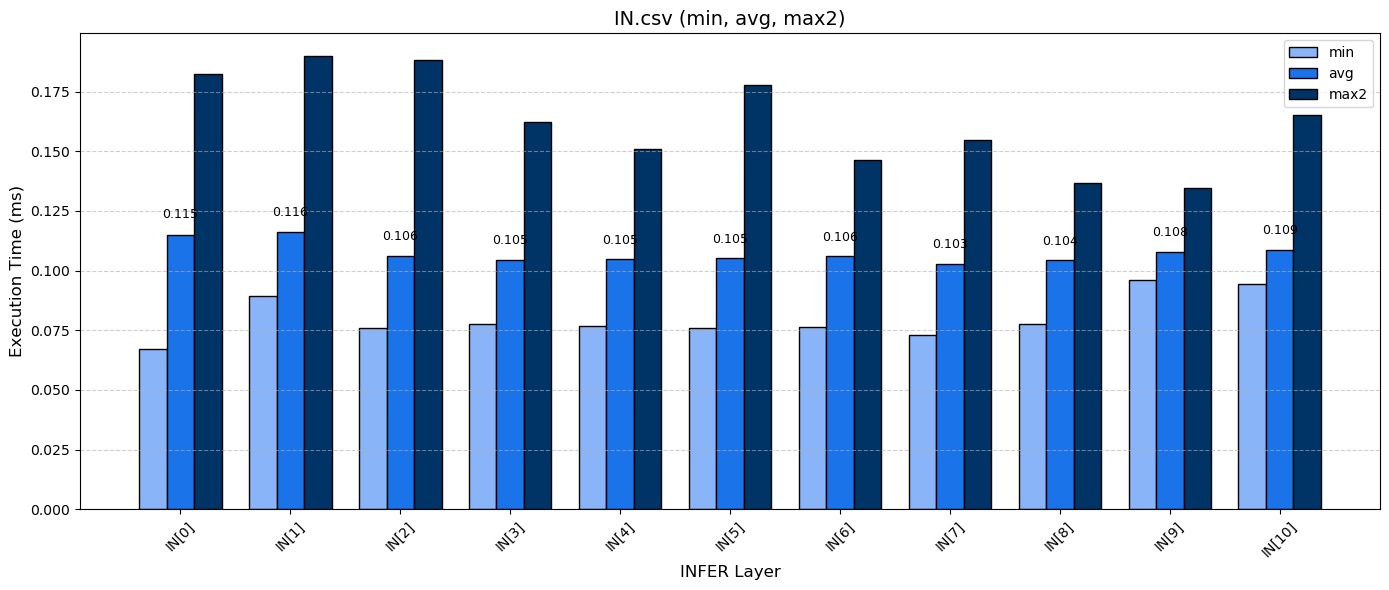

‚úÖ Saved: /home/avees/tee/graph/component/src/IN.png
üìä Processing: INFER.csv


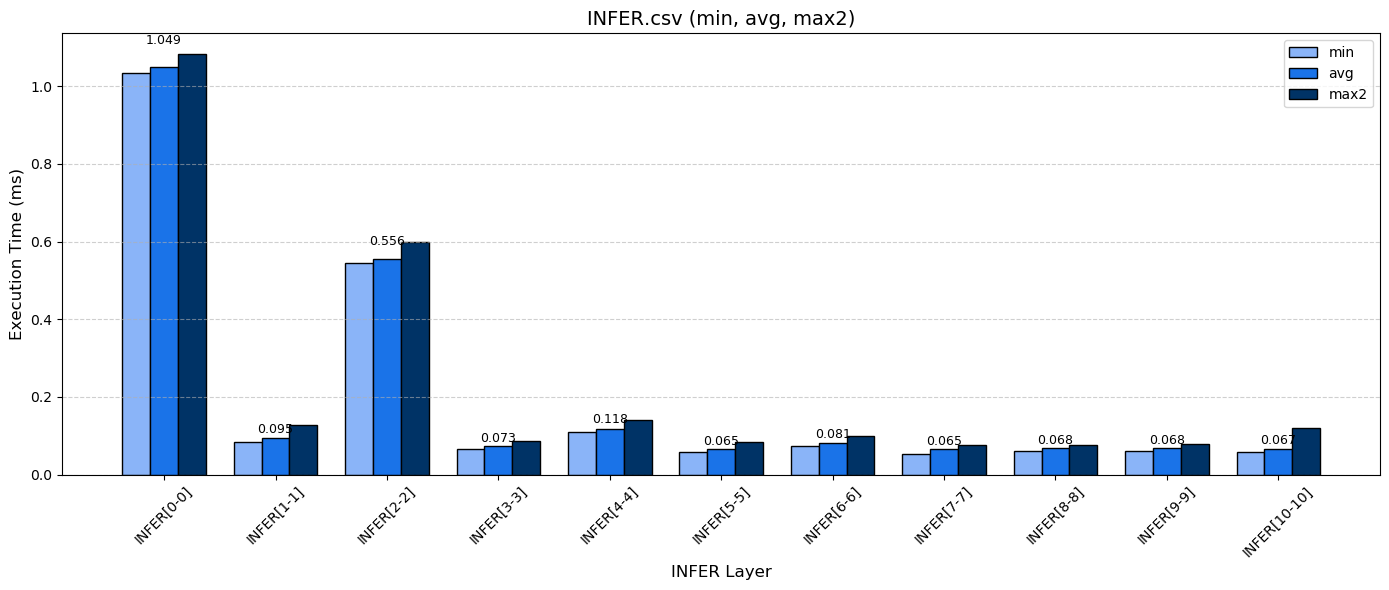

‚úÖ Saved: /home/avees/tee/graph/component/src/INFER.png
üìä Processing: LAYER.csv


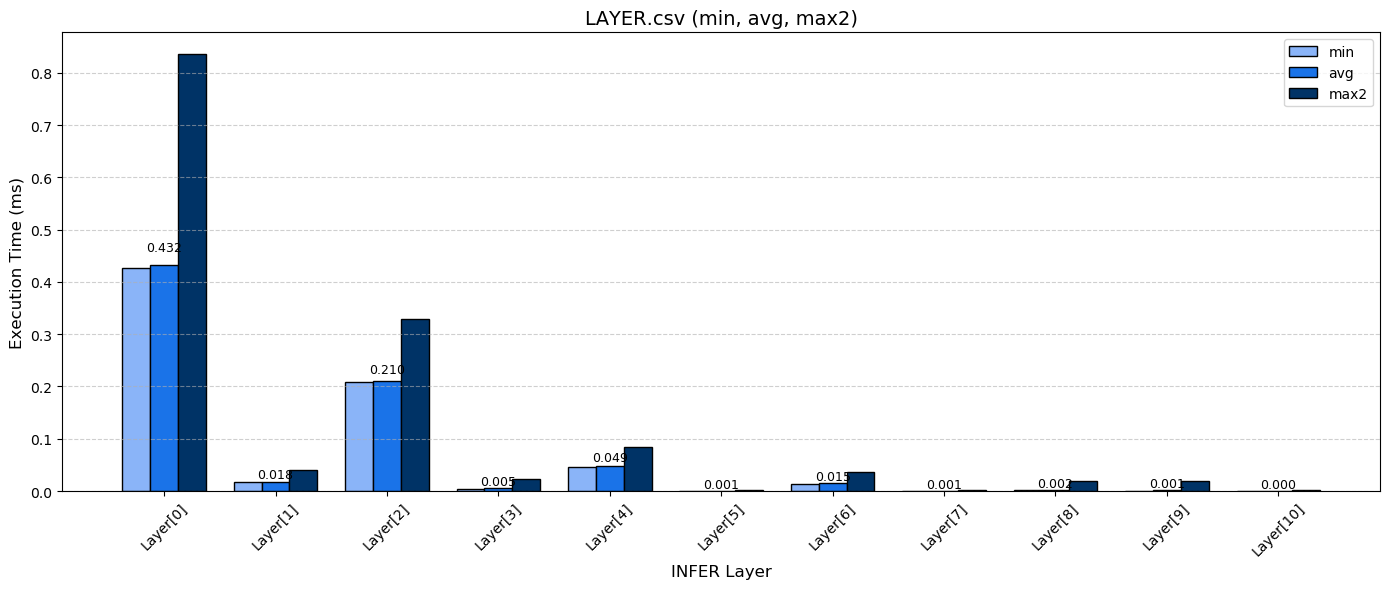

‚úÖ Saved: /home/avees/tee/graph/component/src/LAYER.png
üìä Processing: OUT.csv


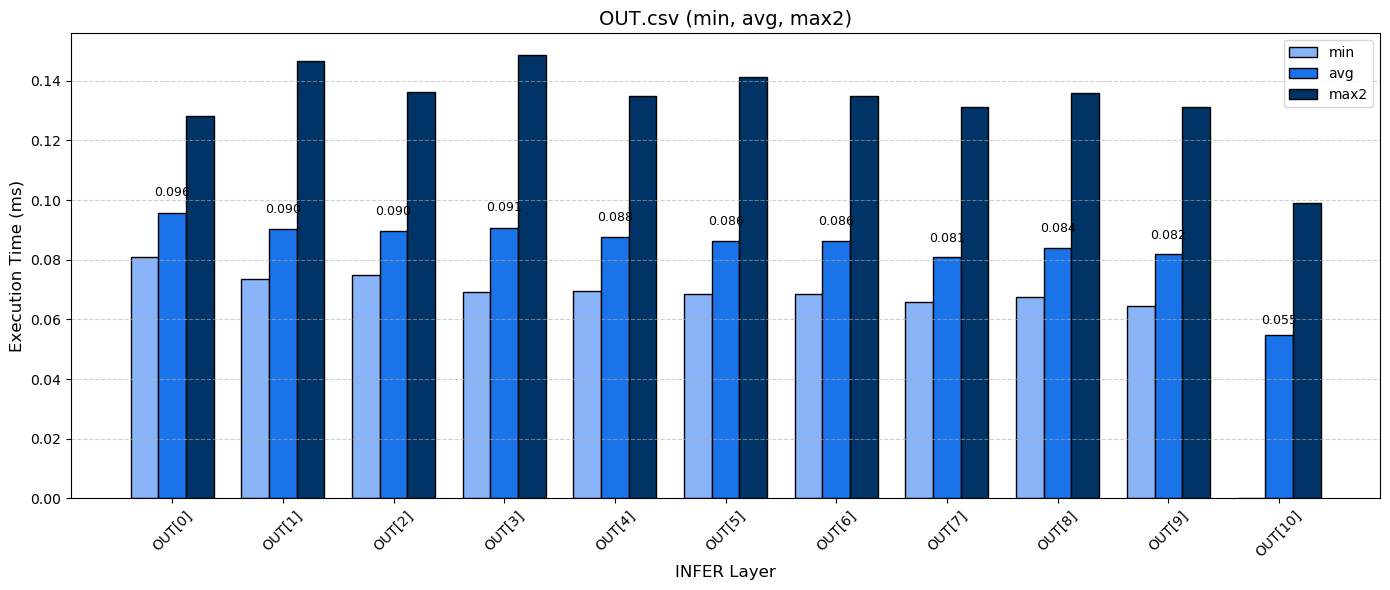

‚úÖ Saved: /home/avees/tee/graph/component/src/OUT.png
üìä Processing: TEE.csv


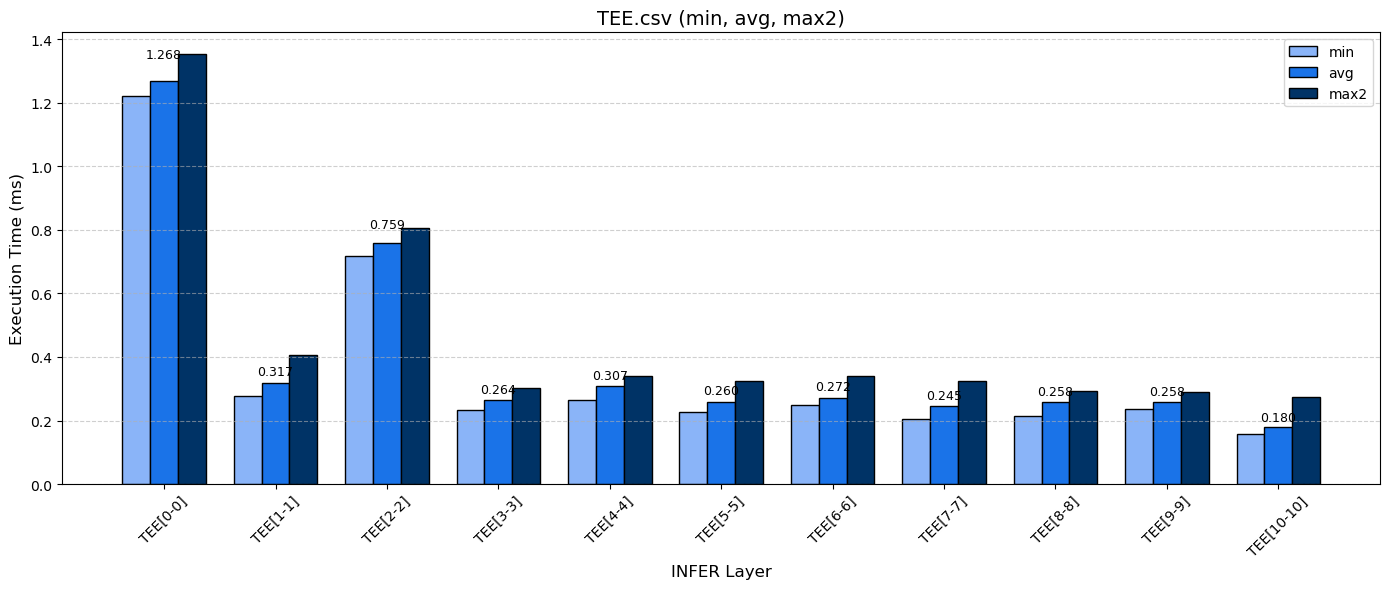

‚úÖ Saved: /home/avees/tee/graph/component/src/TEE.png
üìä Processing: merged.csv


/home/avees/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


TypeError: nan is not a string

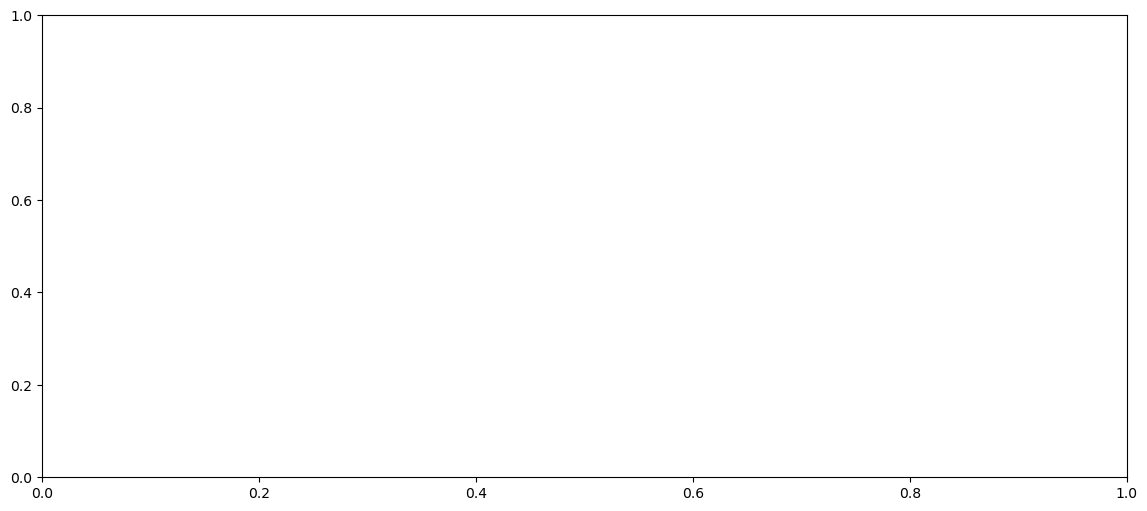

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV Ìè¥Îçî Í≤ΩÎ°ú
csv_dir = "/home/avees/tee/graph/component/src"

# ÎèôÏùºÌïú hueÏóê Ï±ÑÎèÑÎßå Îã§Î•∏ ÏÉâÏÉÅ
colors = ['#8ab4f8', '#1a73e8', '#003366']  # Î∞ùÏùÄ ÌååÎûë ‚Üí Ï§ëÍ∞Ñ ‚Üí ÏßÑÌïú ÎÑ§Ïù¥ÎπÑ

# Ìè¥Îçî ÎÇ¥ Î™®Îì† CSV ÌååÏùº ÏàúÌöå
for filename in sorted(os.listdir(csv_dir)):
    if not filename.endswith(".csv"):
        continue

    csv_path = os.path.join(csv_dir, filename)
    print(f"üìä Processing: {filename}")

    # CSV ÏùΩÍ∏∞
    df = pd.read_csv(csv_path, index_col=0)

    # ÏÇ¨Ïö©Ìï† Ìñâ ÏÑ†ÌÉù (ÏàúÏÑú: min ‚Üí avg ‚Üí max2)
    selected_rows = ['min', 'avg', 'max2']

    # ÌïÑÏöîÌïú ÌñâÏù¥ Î™®Îëê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏúºÎ©¥ Í±¥ÎÑàÎúÄ
    if not all(row in df.index for row in selected_rows):
        print(f"‚ö†Ô∏è  Skipped {filename}: required rows missing ({selected_rows})")
        continue

    df_selected = df.loc[selected_rows]

    # ÎùºÎ≤® (xÏ∂ï)
    labels = df.columns.tolist()
    x = np.arange(len(labels))  # x ÏúÑÏπò

    # ÎßâÎåÄ Ìè≠
    width = 0.25

    plt.figure(figsize=(14, 6))

    # ÎßâÎåÄ Í∑∏ÎûòÌîÑ
    plt.bar(x - width, df_selected.loc['min'], width,
            label='min', color=colors[0], edgecolor='black')
    plt.bar(x, df_selected.loc['avg'], width,
            label='avg', color=colors[1], edgecolor='black')
    plt.bar(x + width, df_selected.loc['max2'], width,
            label='max2', color=colors[2], edgecolor='black')

    # avg ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for i, v in enumerate(df_selected.loc['avg']):
        plt.text(x[i], v + (v * 0.05), f"{v:.3f}", ha='center', va='bottom', fontsize=9)

    # ÏãúÍ∞ÅÏ†Å ÏÑ§Ï†ï
    plt.title(f"{filename} (min, avg, max2)", fontsize=14)
    plt.ylabel("Execution Time (ms)", fontsize=12)
    plt.xlabel("INFER Layer", fontsize=12)
    plt.xticks(x, labels, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # PNG ÌååÏùºÎ°ú Ï†ÄÏû• (Í∞ôÏùÄ Ìè¥ÎçîÏóê)
    png_path = os.path.join(csv_dir, os.path.splitext(filename)[0] + ".png")
    plt.show()
    # plt.savefig(png_path, dpi=300)
    plt.close()

    print(f"‚úÖ Saved: {png_path}")


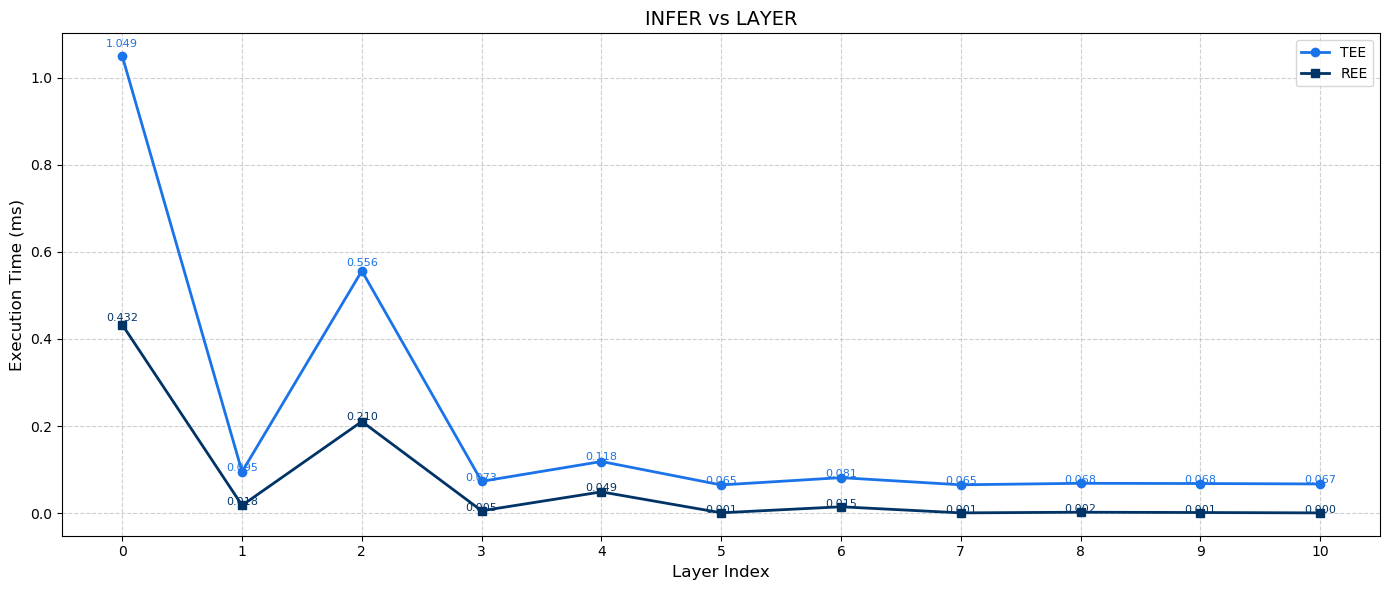

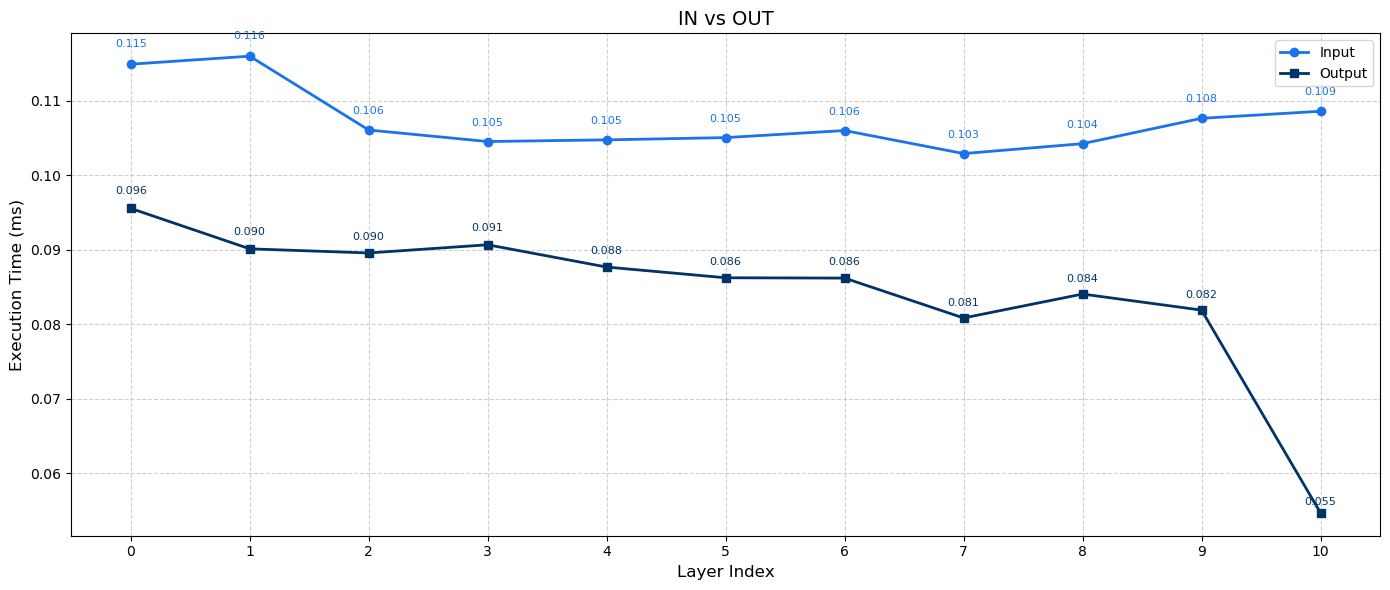

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV Ìè¥Îçî Í≤ΩÎ°ú
csv_dir = "/home/avees/tee/graph/component/src"

# ÏÉâÏÉÅ ÏÑ§Ï†ï (dark blue Í≥ÑÏó¥)
colors = ['#1a73e8', '#003366']  # Îëê Í∞ú Í∑∏ÎûòÌîÑÏö© ÏÉâÏÉÅ

# üîπ Î≤îÎ°Ä(legend) Ïù¥Î¶Ñ ÏßÅÏ†ë ÏßÄÏ†ï
legend_labels = {
    "INFER.csv": "TEE",
    "LAYER.csv": "REE",
    "IN.csv": "Input",
    "OUT.csv": "Output",
}

# ÌååÏùº Í∑∏Î£π Ï†ïÏùò
group_pairs = [
    ("INFER.csv", "LAYER.csv", "INFER vs LAYER"),
    ("IN.csv", "OUT.csv", "IN vs OUT"),
]

for file1, file2, title in group_pairs:
    path1 = os.path.join(csv_dir, file1)
    path2 = os.path.join(csv_dir, file2)

    # Îëê ÌååÏùº Î™®Îëê Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
    if not (os.path.exists(path1) and os.path.exists(path2)):
        print(f"‚ö†Ô∏è  Skipping {title}: one or both files missing")
        continue

    # CSV ÏùΩÍ∏∞
    df1 = pd.read_csv(path1, index_col=0)
    df2 = pd.read_csv(path2, index_col=0)

    # avg ÌñâÎßå Ï∂îÏ∂ú
    if 'avg' not in df1.index or 'avg' not in df2.index:
        print(f"‚ö†Ô∏è  Skipping {title}: 'avg' row missing")
        continue

    avg1 = df1.loc['avg']
    avg2 = df2.loc['avg']

    # xÏ∂ï: Layer index (Ïà´Ïûê)
    x1 = np.arange(len(avg1))
    x2 = np.arange(len(avg2))

    plt.figure(figsize=(14, 6))

    # üîπ legend Ïù¥Î¶Ñ ÏßÄÏ†ï
    label1 = legend_labels.get(file1, file1.replace('.csv', ''))
    label2 = legend_labels.get(file2, file2.replace('.csv', ''))

    # Í∫æÏùÄÏÑ†Í∑∏ÎûòÌîÑ
    plt.plot(x1, avg1.values, marker='o', linestyle='-', color=colors[0], linewidth=2, label=label1)
    plt.plot(x2, avg2.values, marker='s', linestyle='-', color=colors[1], linewidth=2, label=label2)

    # Í∞Å Ï†ê ÏúÑÏóê Í∞í ÌëúÏãú
    for i, v in enumerate(avg1.values):
        plt.text(i, v + (v * 0.02), f"{v:.3f}", ha='center', fontsize=8, color=colors[0])
    for i, v in enumerate(avg2.values):
        plt.text(i, v + (v * 0.02), f"{v:.3f}", ha='center', fontsize=8, color=colors[1])

    # ÏãúÍ∞ÅÏ†Å ÏÑ§Ï†ï
    plt.title(f"{title}", fontsize=14)
    plt.xlabel("Layer Index", fontsize=12)
    plt.ylabel("Execution Time (ms)", fontsize=12)
    plt.xticks(x1)  # xÏ∂ïÏùÑ 0,1,2,... ÌòïÌÉúÎ°ú ÌëúÏãú
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [16]:
import os
import pandas as pd

# CSV Ìè¥Îçî Í≤ΩÎ°ú
csv_dir = "/home/avees/tee/output/tee_time"
output_path = os.path.join(csv_dir, "merged.csv")

# Î™®Îì† CSVÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
all_dfs = []

# ÎîîÎ†âÌÜ†Î¶¨ ÎÇ¥ Î™®Îì† CSV ÌååÏùº ÏàúÌöå
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # ÌååÏùºÎ™Ö(ÌôïÏû•Ïûê Ï†úÏô∏) Ï†ÄÏû•Ïö© Ïó¥ Ï∂îÍ∞Ä
        df.insert(0, "source", os.path.splitext(filename)[0])

        # DataFrame Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
        all_dfs.append(df)

# Î™®Îì† CSV Î≥ëÌï© (ÏïÑÎûòÎ°ú concat)
merged_df = pd.concat(all_dfs, ignore_index=True)

# Î≥ëÌï©Îêú CSV Ï†ÄÏû•
merged_df.to_csv(output_path, index=False)

print(f"‚úÖ Î™®Îì† CSV ÌååÏùºÏùÑ Î≥ëÌï©ÌïòÏó¨ Ï†ÄÏû•ÌñàÏäµÎãàÎã§: {output_path}")
print(f"Ï¥ù Ìñâ Í∞úÏàò: {len(merged_df)}")


ValueError: cannot insert source, already exists

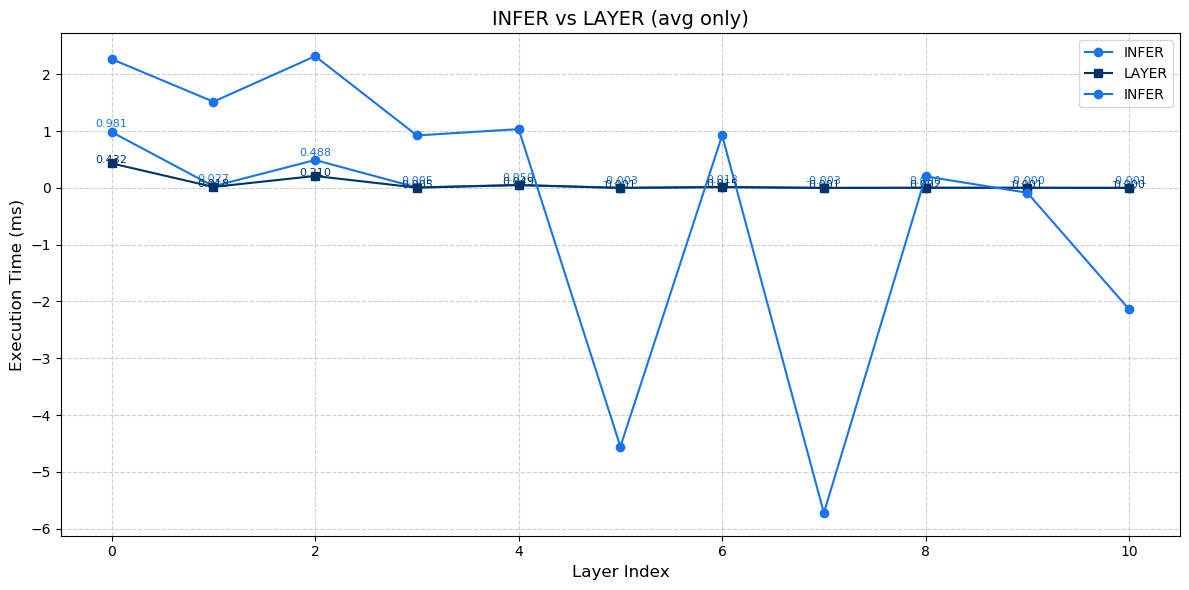

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV Ìè¥Îçî Í≤ΩÎ°ú
csv_dir = "/home/avees/tee/graph/component/src"

# ÏÉâÏÉÅ ÏÑ§Ï†ï (dark blue Í≥ÑÏó¥)
colors = ['#1a73e8', '#003366']  # INFER/LAYER, IN/OUT Í∞ÅÍ∞Å Íµ¨Î∂ÑÏö©

# ÌååÏùº Í∑∏Î£π Ï†ïÏùò
group_pairs = [
    ("INFER.csv", "LAYER.csv", "INFER vs LAYER"),
]

for file1, file2, title in group_pairs:
    path1 = os.path.join(csv_dir, file1)
    path2 = os.path.join(csv_dir, file2)

    # Îëê ÌååÏùº Î™®Îëê Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
    if not (os.path.exists(path1) and os.path.exists(path2)):
        print(f"‚ö†Ô∏è  Skipping {title}: one or both files missing")
        continue

    # CSV ÏùΩÍ∏∞
    df1 = pd.read_csv(path1, index_col=0)
    df2 = pd.read_csv(path2, index_col=0)

    # avg ÌñâÎßå Ï∂îÏ∂ú
    if 'avg' not in df1.index or 'avg' not in df2.index:
        print(f"‚ö†Ô∏è  Skipping {title}: 'avg' row missing")
        continue

    avg1 = df1.loc['avg']
    avg2 = df2.loc['avg']

    # Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
    plt.figure(figsize=(12, 6))
    x1 = np.arange(len(avg1))
    x2 = np.arange(len(avg2))

    plt.plot(x1, avg1.values-0.065, marker='o', linestyle='-', color=colors[0], label=file1.replace('.csv', ''))
    plt.plot(x2, avg2.values, marker='s', linestyle='-', color=colors[1], label=file2.replace('.csv', ''))
    plt.plot(x1, (avg1.values-0.068) / avg2.values, marker='o', linestyle='-', color=colors[0], label=file1.replace('.csv', ''))

    # Í∞í ÌëúÏãú
    for i, v in enumerate(avg1.values):
        plt.text(i, v + (v * 0.02), f"{v-0.068:.3f}", ha='center', fontsize=8, color=colors[0])
    for i, v in enumerate(avg2.values):
        plt.text(i, v + (v * 0.02), f"{v:.3f}", ha='center', fontsize=8, color=colors[1])

    # ÏãúÍ∞ÅÏ†Å ÏÑ§Ï†ï
    plt.title(f"{title} (avg only)", fontsize=14)
    plt.xlabel("Layer Index", fontsize=12)
    plt.ylabel("Execution Time (ms)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


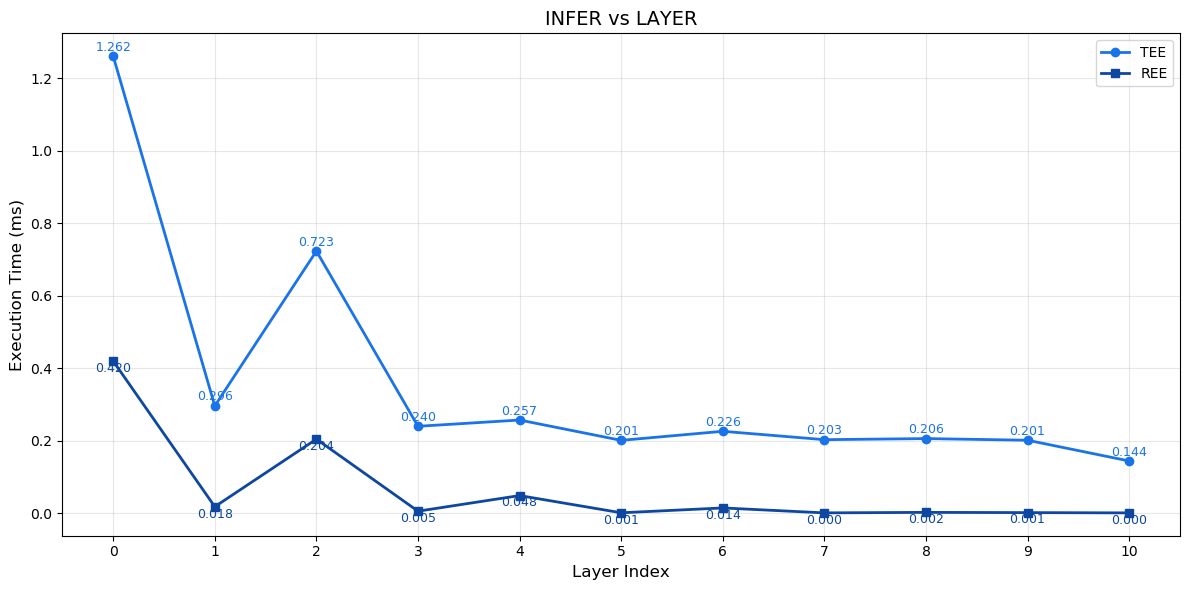

‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: /home/avees/tee/output/tee_layer_line_comparison.png


In [18]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/home/avees/tee/output/output_merged.csv"

# CSV ÏùΩÍ∏∞
df = pd.read_csv(csv_path)
df.rename(columns={"mean(exclude_max)": "mean"}, inplace=True)

# üîπ TEE, LAYERÎßå ÌïÑÌÑ∞ÎßÅ (ÎåÄÏÜåÎ¨∏Ïûê Î¨¥Ïãú)
df = df[df["label"].str.contains("TEE|LAYER", case=False, na=False)].copy()

# üîπ index Ï∂îÏ∂ú Ìï®Ïàò
def extract_index(label):
    label = label.upper()
    # TEE[a-a] ‚Üí a
    m1 = re.search(r"TEE\[(\d+)-\1\]", label)
    # LAYER[a] ÎòêÎäî LAYER[a-a] ‚Üí a
    m2 = re.search(r"LAYER\[(\d+)(?:-\1)?\]", label)
    if m1:
        return int(m1.group(1))
    elif m2:
        return int(m2.group(1))
    return None

df["index"] = df["label"].apply(extract_index)
df = df.dropna(subset=["index"]).copy()
df["index"] = df["index"].astype(int)

# üîπ Î∂ÑÎ¶¨
tee_df = df[df["label"].str.contains("TEE", case=False)]
layer_df = df[df["label"].str.contains("LAYER", case=False)]

# üîπ XÏ∂ï Î≤îÏúÑ 0~10
x_labels = list(range(0, 11))
x = np.arange(len(x_labels))

tee_y, layer_y = [], []

for i in x_labels:
    tee_row = tee_df[tee_df["index"] == i]
    layer_row = layer_df[layer_df["index"] == i]
    tee_val = tee_row["mean"].values[0] if not tee_row.empty else np.nan
    layer_val = layer_row["mean"].values[0] if not layer_row.empty else np.nan
    tee_y.append(tee_val)
    layer_y.append(layer_val)

# üîπ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 6))
plt.plot(x, tee_y, marker='o', color="#1a73e8", label='TEE', linewidth=2)
plt.plot(x, layer_y, marker='s', color="#0d47a1", label='REE', linewidth=2)

# Í∞Å Ï†êÏóê ÏàòÏπò ÌëúÏãú
for i, (ty, ly) in enumerate(zip(tee_y, layer_y)):
    if not np.isnan(ty):
        plt.text(i, ty + 0.015, f"{ty:.3f}", color="#1a73e8", ha='center', fontsize=9)
    if not np.isnan(ly):
        plt.text(i, ly - 0.03, f"{ly:.3f}", color="#0d47a1", ha='center', fontsize=9)

# ÏÑ§Ï†ï
plt.xticks(x, x_labels)
plt.xlabel("Layer Index", fontsize=12)
plt.ylabel("Execution Time (ms)", fontsize=12)
plt.title("INFER vs LAYER", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Ï†ÄÏû•
output_png = os.path.join(os.path.dirname(csv_path), "tee_layer_line_comparison.png")
plt.savefig(output_png, dpi=300)
plt.show()

print(f"‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: {output_png}")


‚úÖ IN ÎùºÎ≤® Í∞úÏàò: 11
‚úÖ OUT ÎùºÎ≤® Í∞úÏàò: 11


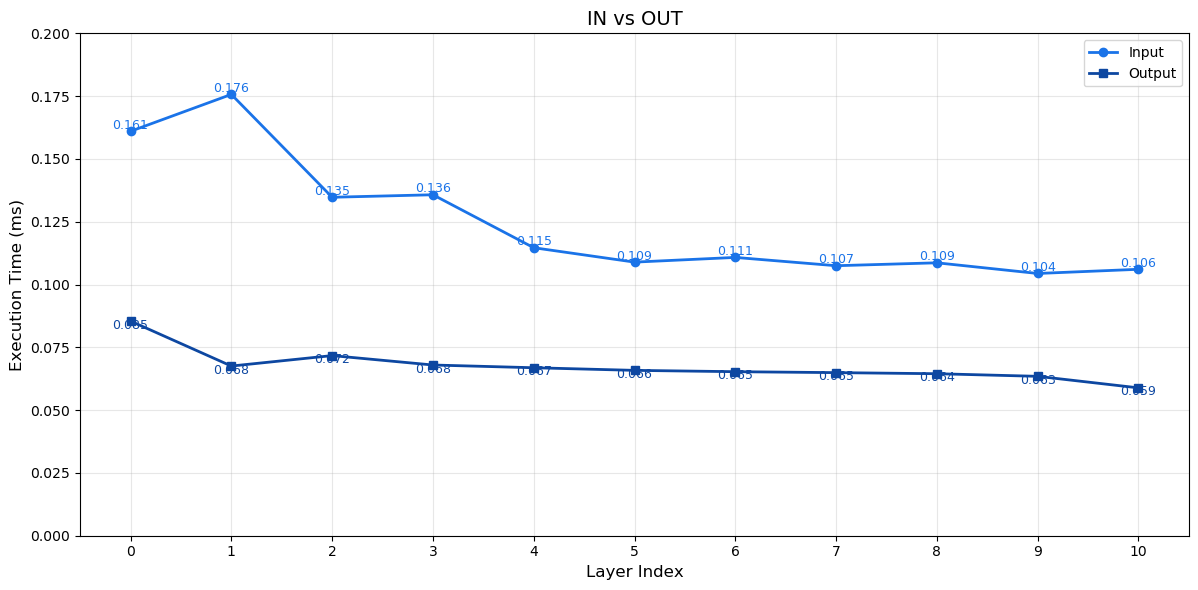

‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: /home/avees/tee/output/in_out_line_comparison_fixed.png


In [23]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/home/avees/tee/output/output_merged.csv"

# CSV ÏùΩÍ∏∞
df = pd.read_csv(csv_path)
df.rename(columns={"mean(exclude_max)": "mean"}, inplace=True)

# üîπ IN, OUTÎßå ÌïÑÌÑ∞ÎßÅ (ÎåÄÏÜåÎ¨∏Ïûê Î¨¥Ïãú)
df = df[df["label"].str.contains("IN|OUT", case=False, na=False)].copy()

# üîπ index Ï∂îÏ∂ú (IN[0], OUT[0] ÌòïÏãù)
def extract_index(label):
    label = label.upper()
    m = re.search(r"(?:IN|OUT)\[(\d+)\]", label)
    if m:
        return int(m.group(1))
    return None

df["index"] = df["label"].apply(extract_index)
df = df.dropna(subset=["index"]).copy()
df["index"] = df["index"].astype(int)

# üîπ Î∂ÑÎ¶¨
in_df = df[df["label"].str.contains("IN", case=False)]
out_df = df[df["label"].str.contains("OUT", case=False)]

print(f"‚úÖ IN ÎùºÎ≤® Í∞úÏàò: {len(in_df)}")
print(f"‚úÖ OUT ÎùºÎ≤® Í∞úÏàò: {len(out_df)}")

# üîπ XÏ∂ï (0~10)
x_labels = sorted(set(df["index"]))
x = np.arange(len(x_labels))

in_y, out_y = [], []

for i in x_labels:
    in_row = in_df[in_df["index"] == i]
    out_row = out_df[out_df["index"] == i]
    in_val = in_row["mean"].values[0] if not in_row.empty else np.nan
    out_val = out_row["mean"].values[0] if not out_row.empty else np.nan
    in_y.append(in_val)
    out_y.append(out_val)

# üîπ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 6))
plt.plot(x, in_y, marker='o', color="#1a73e8", label='Input', linewidth=2)
plt.plot(x, out_y, marker='s', color="#0d47a1", label='Output', linewidth=2)

# üîπ Ï†ê ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for i, (iy, oy) in enumerate(zip(in_y, out_y)):
    if not np.isnan(iy):
        plt.text(i, iy + 0.001, f"{iy:.3f}", color="#1a73e8", ha='center', fontsize=9)
    if not np.isnan(oy):
        plt.text(i, oy - 0.003, f"{oy:.3f}", color="#0d47a1", ha='center', fontsize=9)

# üîπ Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xticks(x, x_labels)
plt.xlabel("Layer Index", fontsize=12)
plt.ylabel("Execution Time (ms)", fontsize=12)
plt.title("IN vs OUT", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.ylim(0,.2)
# Ï†ÄÏû•
output_png = os.path.join(os.path.dirname(csv_path), "in_out_line_comparison_fixed.png")
plt.savefig(output_png, dpi=300)
plt.show()

print(f"‚úÖ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: {output_png}")
